## RIQUEZAS-TOTALES

### Quiero ver como se dividen las riquezas por los diferentes paises, de los mas ricos a los mas pobres

dataset --> https://www.kaggle.com/datasets/arpitsinghaiml/average-net-worth-by-country/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

## 1 - LIMPIEZA

In [2]:
data = pd.read_csv("average-net-worth-by-country-2021.csv")

In [3]:
data.head(20)

,country,AverageNetWorthTotalWealth2021,AverageNetWorthGDPPerAdult2021,AverageNetWorthWealthPerAdult2021,AverageNetWorthShareOfWorldWealth2021
0,India,14225.0,3465,15535.0,3.07
1,China,85107.0,15765,76639.0,18.36
2,United States,145793.0,91340,579051.0,31.45
3,Indonesia,3405.0,6472,18534.0,0.73
4,Pakistan,790.0,2366,6237.0,0.20
5,Nigeria,752.0,4218,7618.0,0.20
6,Brazil,3327.0,9993,21429.0,0.72
7,Bangladesh,1026.0,3333,9490.0,0.22
8,Russia,3789.0,15750,34005.0,0.80
9,Ethiopia,228.0,1679,3861.0,0.05


In [4]:
data = data.rename(columns={
    'country': 'pais',
    'AverageNetWorthTotalWealth2021': 'RiquezaTotal',
    'AverageNetWorthGDPPerAdult2021': 'PIBporAdulto',
    'AverageNetWorthWealthPerAdult2021': 'RiquezaPorAdulto',
    'AverageNetWorthShareOfWorldWealth2021': 'ParticipacionRiquezaMundial'
})

In [5]:
data.head(20)

,pais,RiquezaTotal,PIBporAdulto,RiquezaPorAdulto,ParticipacionRiquezaMundial
0,India,14225.0,3465,15535.0,3.07
1,China,85107.0,15765,76639.0,18.36
2,United States,145793.0,91340,579051.0,31.45
3,Indonesia,3405.0,6472,18534.0,0.73
4,Pakistan,790.0,2366,6237.0,0.20
5,Nigeria,752.0,4218,7618.0,0.20
6,Brazil,3327.0,9993,21429.0,0.72
7,Bangladesh,1026.0,3333,9490.0,0.22
8,Russia,3789.0,15750,34005.0,0.80
9,Ethiopia,228.0,1679,3861.0,0.05


In [6]:
# Porcentaje de nulos
data.isnull().sum() / len(data) * 100

pais                            0.000000
RiquezaTotal                   21.296296
PIBporAdulto                    0.000000
RiquezaPorAdulto               20.833333
ParticipacionRiquezaMundial    49.074074
dtype: float64

In [7]:
data[data.get("RiquezaTotal").isnull()]

,pais,RiquezaTotal,PIBporAdulto,RiquezaPorAdulto,ParticipacionRiquezaMundial
29,Sudan,NaN,2802,NaN,NaN
42,Uzbekistan,NaN,3063,NaN,NaN
49,Ivory Coast,NaN,5296,NaN,NaN
55,North Korea,NaN,931,NaN,NaN
67,Somalia,NaN,280,NaN,NaN
69,Guatemala,NaN,8198,NaN,NaN
80,South Sudan,NaN,2204,NaN,NaN
84,Dominican Republic,NaN,13374,NaN,NaN
86,Cuba,NaN,12849,NaN,NaN
87,Honduras,NaN,4643,NaN,NaN


In [8]:
# Nos quedamos con los valores que no son nulos
data = data[
    data['RiquezaTotal'].notnull()
]

In [9]:
data.head()

,pais,RiquezaTotal,PIBporAdulto,RiquezaPorAdulto,ParticipacionRiquezaMundial
0,India,14225.0,3465,15535.0,3.07
1,China,85107.0,15765,76639.0,18.36
2,United States,145793.0,91340,579051.0,31.45
3,Indonesia,3405.0,6472,18534.0,0.73
4,Pakistan,790.0,2366,6237.0,0.20


In [10]:
data['pais'].duplicated().any()

False

In [11]:
data['pais'] = data['pais'].str.lower().str.strip()

In [12]:
print(data['pais'].tolist())

['india', 'china', 'united states', 'indonesia', 'pakistan', 'nigeria', 'brazil', 'bangladesh', 'russia', 'ethiopia', 'mexico', 'japan', 'egypt', 'philippines', 'dr congo', 'vietnam', 'iran', 'turkey', 'germany', 'thailand', 'united kingdom', 'tanzania', 'france', 'south africa', 'italy', 'kenya', 'myanmar', 'colombia', 'south korea', 'uganda', 'spain', 'algeria', 'iraq', 'argentina', 'afghanistan', 'yemen', 'canada', 'poland', 'morocco', 'angola', 'ukraine', 'malaysia', 'mozambique', 'ghana', 'peru', 'saudi arabia', 'madagascar', 'nepal', 'cameroon', 'venezuela', 'niger', 'australia', 'syria', 'mali', 'burkina faso', 'taiwan', 'sri lanka', 'malawi', 'zambia', 'kazakhstan', 'chad', 'chile', 'romania', 'senegal', 'netherlands', 'ecuador', 'cambodia', 'zimbabwe', 'guinea', 'benin', 'rwanda', 'burundi', 'bolivia', 'tunisia', 'haiti', 'belgium', 'jordan', 'united arab emirates', 'czech republic', 'sweden', 'tajikistan', 'papua new guinea', 'portugal', 'azerbaijan', 'greece', 'hungary', 'to

In [13]:
dicc_pais = {
    'united states': 'united states of america',
    'dr congo': 'democratic republic of the congo',
    'tanzania': 'united republic of tanzania',
    'hong kong sar': 'china',
    'serbia': 'republic of serbia',
    'guinea-bissau': 'guinea bissau',
    'timor-leste': 'east timor',
    'bahamas': 'the bahamas',
    'czechia': 'czech republic',
    'north macedonia': 'macedonia',
    'eswatini': 'swaziland',
    'ivory coast': 'côte d’ivoire',
    'hong kong': 'china',
    'dominica': 'dominican republic'
}

data['pais'] = data['pais'].replace(dicc_pais)

## 2 - ANALISIS EXPLORATORIO

In [14]:
data.head()

,pais,RiquezaTotal,PIBporAdulto,RiquezaPorAdulto,ParticipacionRiquezaMundial
0,india,14225.0,3465,15535.0,3.07
1,china,85107.0,15765,76639.0,18.36
2,united states of america,145793.0,91340,579051.0,31.45
3,indonesia,3405.0,6472,18534.0,0.73
4,pakistan,790.0,2366,6237.0,0.20


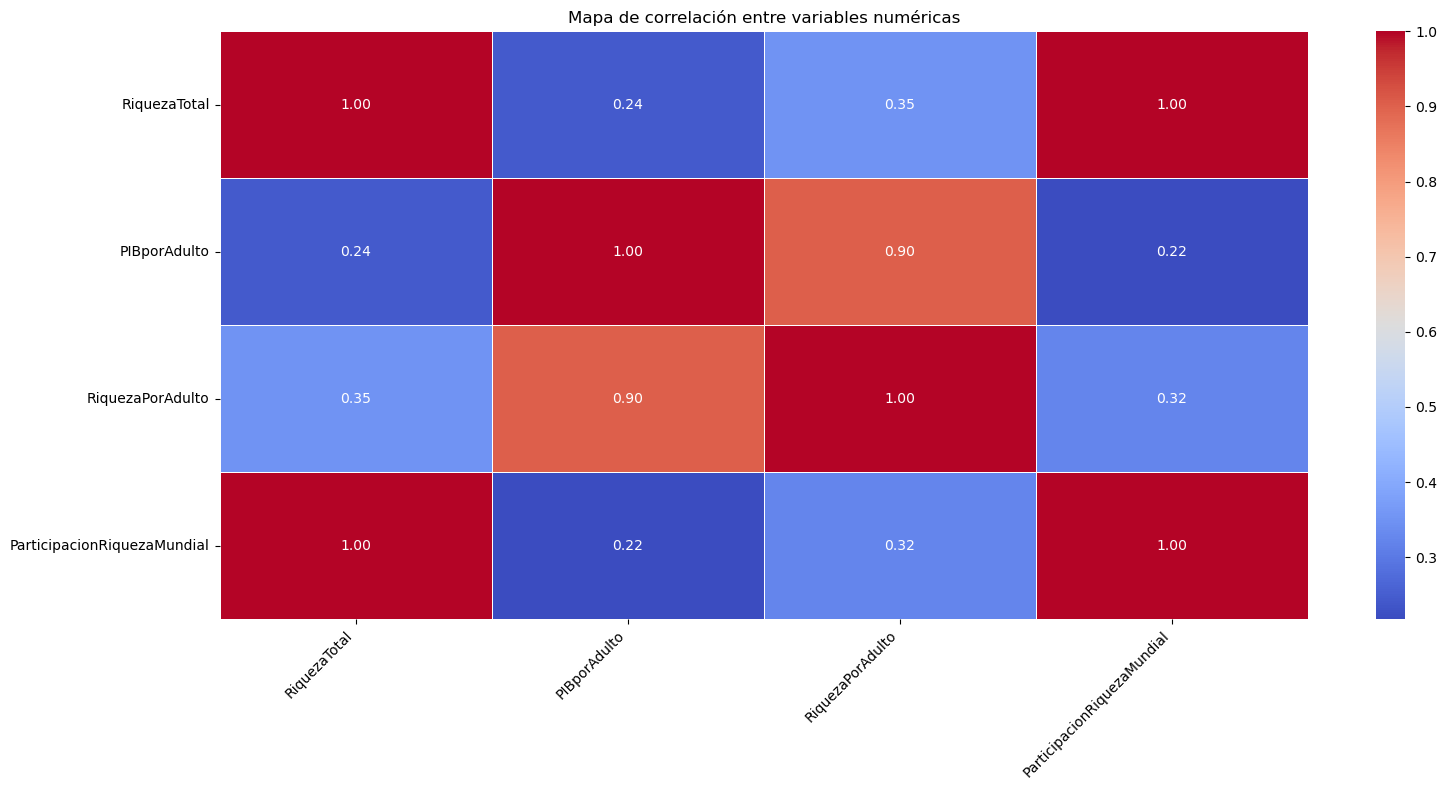

In [15]:
df_numerico = data.select_dtypes(include=["float64", "int64"])

matriz_correlacion = df_numerico.corr()

plt.figure(figsize=(16, 8)) 
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlación entre variables numéricas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

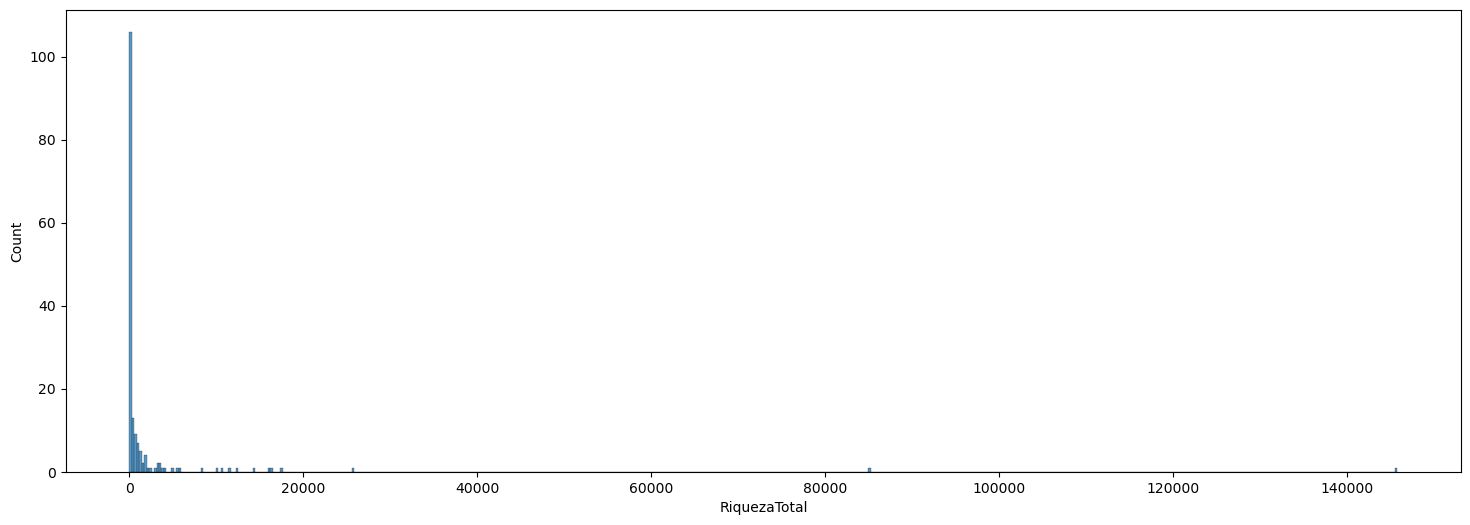

In [16]:
plt.figure(figsize=(18, 6))
sns.histplot(data['RiquezaTotal'])
plt.show()

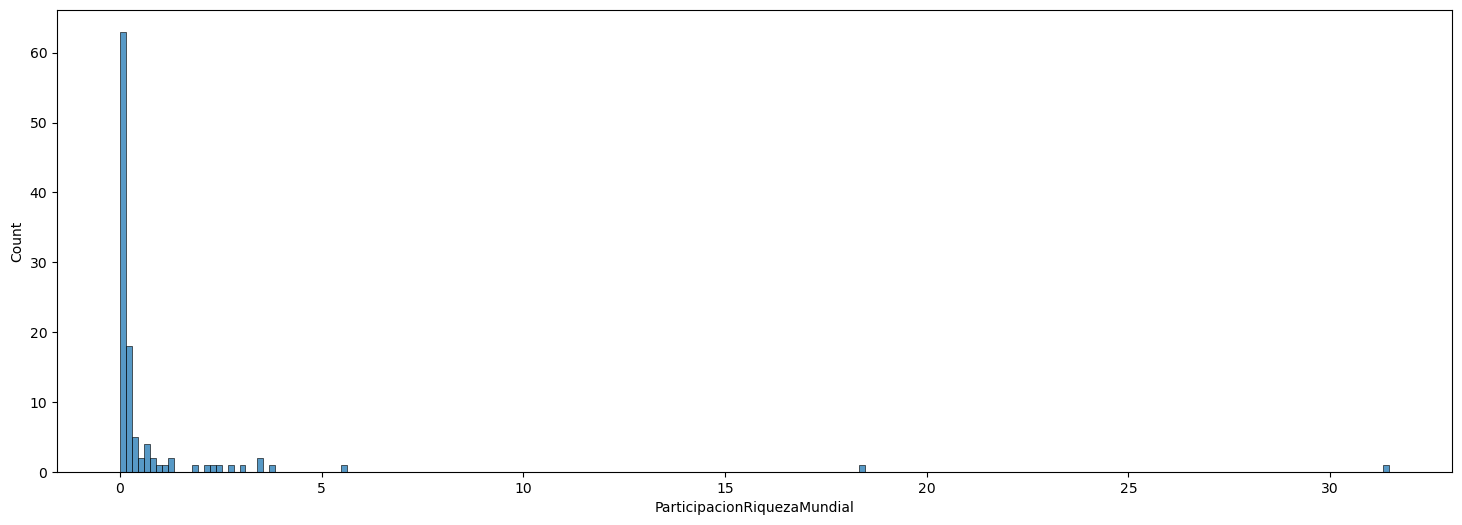

In [17]:
plt.figure(figsize=(18, 6))
sns.histplot(data['ParticipacionRiquezaMundial'])
plt.show()

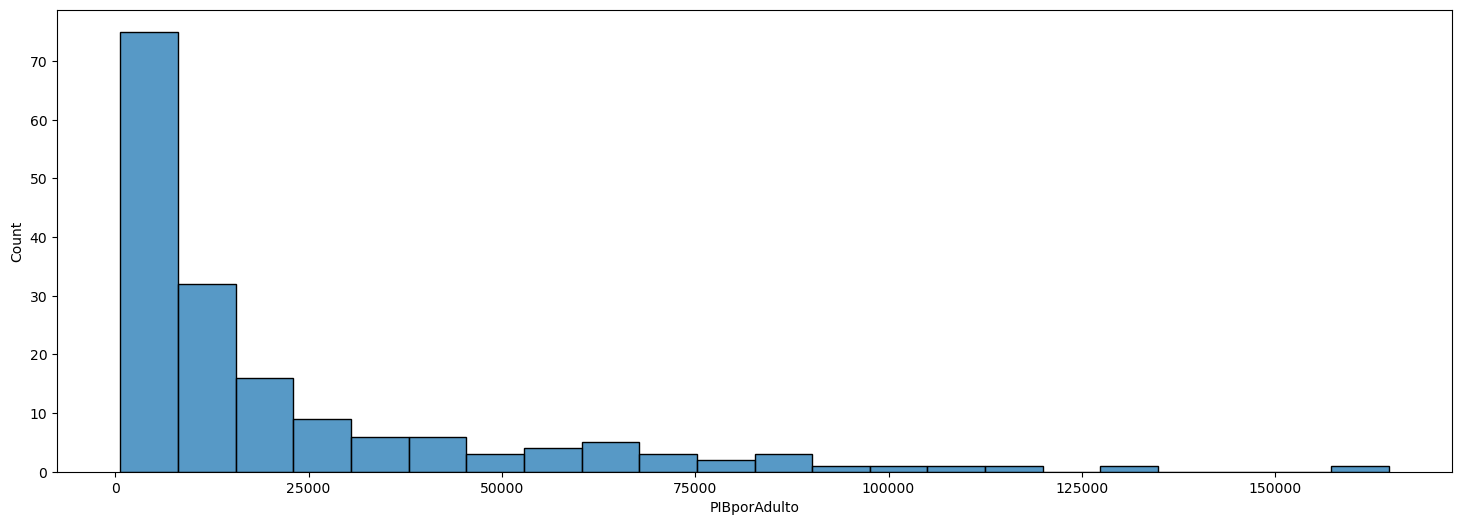

In [18]:
plt.figure(figsize=(18, 6))
sns.histplot(data['PIBporAdulto'])
plt.show()

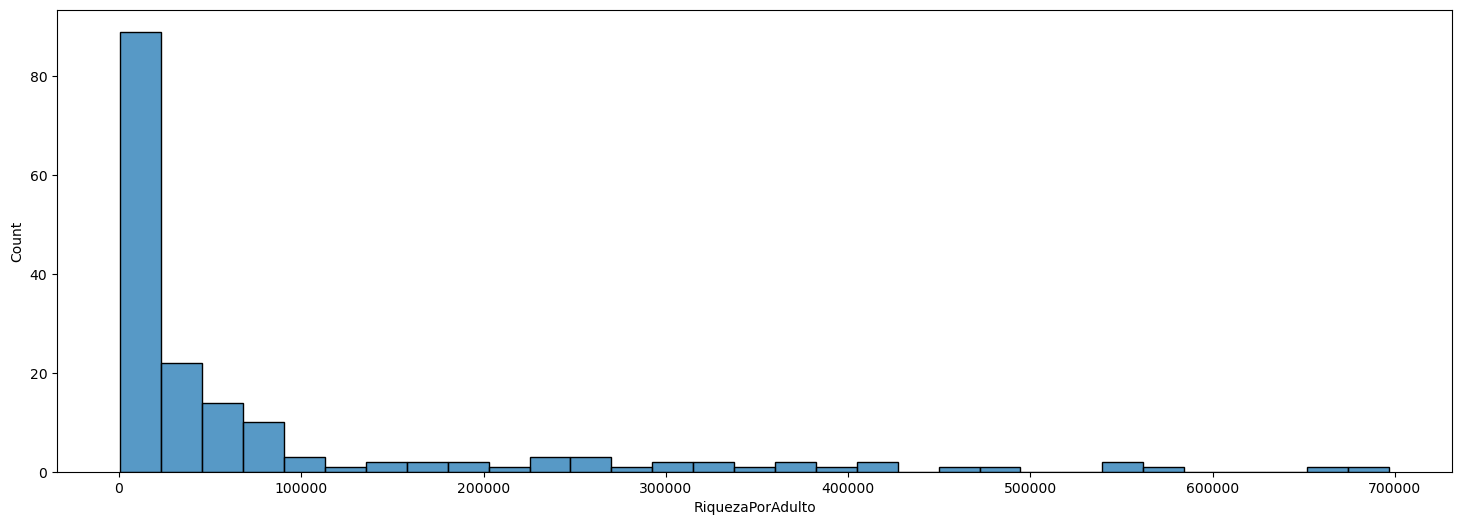

In [19]:
plt.figure(figsize=(18, 6))
sns.histplot(data['RiquezaPorAdulto'])
plt.show()

In [20]:
# Correlación muy fuerte entre RiquezaTotal - ParticipacionRiquezaMundial y PIBporAdulto - RiquezaPorAdulto
# Graficamos cada uno y vemos que es lo mismo.
# Nos quedamos con 'RiquezaTotal' y 'PIBporAdulto' ya que tienen un porcentaje menor de nulos.
data = data[['pais', 'RiquezaTotal', 'PIBporAdulto']]

In [21]:
data.head()

,pais,RiquezaTotal,PIBporAdulto
0,india,14225.0,3465
1,china,85107.0,15765
2,united states of america,145793.0,91340
3,indonesia,3405.0,6472
4,pakistan,790.0,2366


In [22]:
# Top 5 países mas ricos
data.nlargest(5, 'RiquezaTotal')

,pais,RiquezaTotal,PIBporAdulto
2,united states of america,145793.0,91340
1,china,85107.0,15765
11,japan,25692.0,45449
18,germany,17489.0,59423
20,united kingdom,16261.0,59377


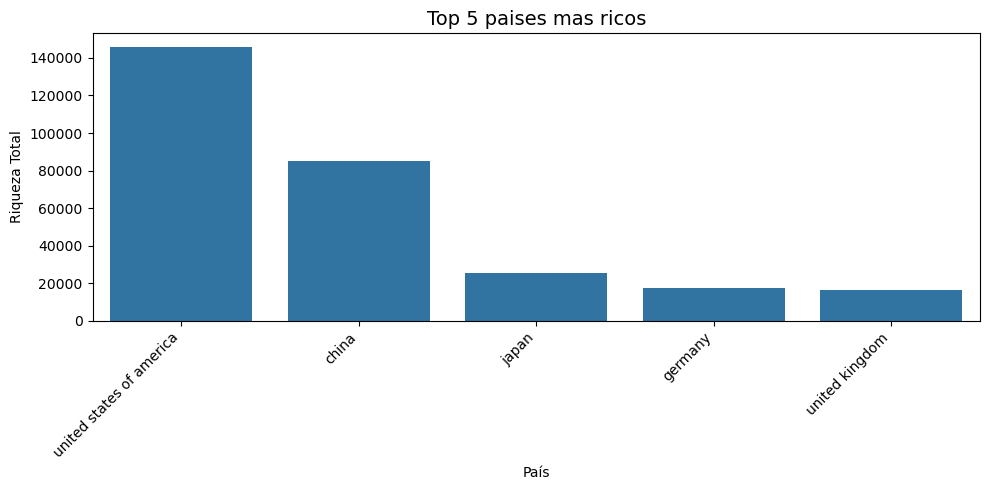

In [23]:
# Top 5 países mas ricos
top5 = data.nlargest(5, 'RiquezaTotal')

plt.figure(figsize=(10, 5))

sns.barplot(
    data=top5,
    x='pais',
    y='RiquezaTotal'
)

plt.title('Top 5 paises mas ricos', fontsize=14)
plt.xlabel('País')
plt.ylabel('Riqueza Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
# Top 5 países mas pobres
data.nsmallest(5, 'RiquezaTotal')

,pais,RiquezaTotal,PIBporAdulto
195,saint vincent and the grenadines,1.0,10299
196,antigua and barbuda,1.0,20640
121,central african republic,2.0,1129
146,lesotho,2.0,2159
147,guinea bissau,2.0,1488


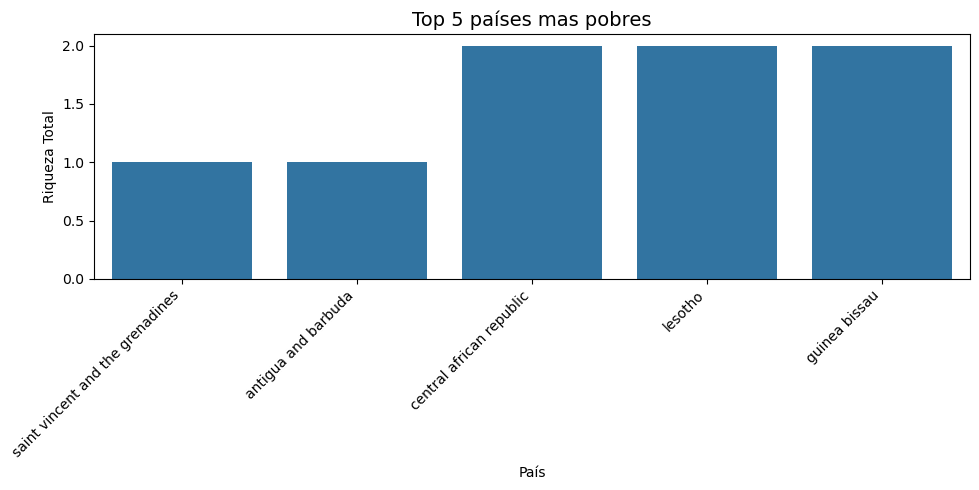

In [25]:
# Top 5 países mas pobres
bottom5 = data.nsmallest(5, 'RiquezaTotal')

plt.figure(figsize=(10, 5))

sns.barplot(
    data=bottom5,
    x='pais',
    y='RiquezaTotal'
)

plt.title('Top 5 países mas pobres', fontsize=14)
plt.xlabel('País')
plt.ylabel('Riqueza Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


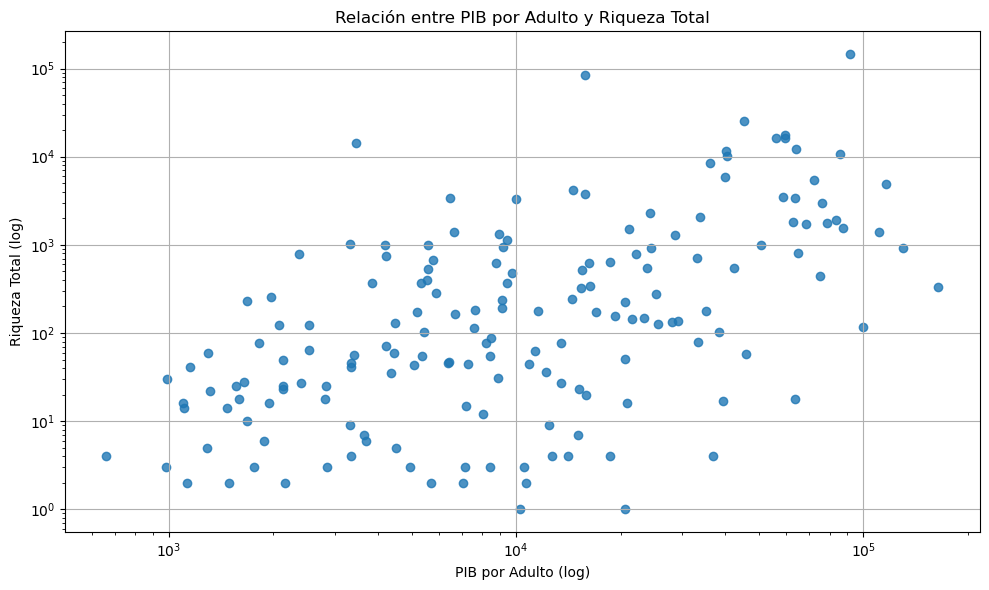

In [26]:
# Gráfico de dispersión con regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=data,
    x='PIBporAdulto',
    y='RiquezaTotal',
    fit_reg=False  # Esto quita la línea de regresión
)

# Escala logarítmica en ambos ejes (opcional pero recomendable)
plt.xscale('log')
plt.yscale('log')

# Etiquetas y título
plt.xlabel('PIB por Adulto (log)')
plt.ylabel('Riqueza Total (log)')
plt.title('Relación entre PIB por Adulto y Riqueza Total')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# 1. Cargar GeoJSON de países
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)
geojson_data = response.json()

# 2. Normaliza nombres en el GeoJSON
for feature in geojson_data['features']:
    feature['properties']['name'] = feature['properties']['name'].lower()

# 3. Preparar DataFrame
data['log_riqueza_total'] = np.log10(data['RiquezaTotal'] + 1)

# 4. Crear mapa base con estilo oscuro para contraste y tamaño más pequeño
m = folium.Map(
    location=[20, 0],
    zoom_start=2,
    tiles='cartodbdark_matter'
)

# 5. Estilo tipo "heatmap" por país con líneas visibles
folium.Choropleth(
    geo_data=geojson_data,
    data=data,
    columns=['pais', 'log_riqueza_total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  
    fill_opacity=0.9,
    line_opacity=0.7,        
    line_color='white',      
    nan_fill_color='black',
    legend_name='Log₁₀(Riqueza Total + 1)',
    highlight=True,
).add_to(m)

# 6. Tooltip sencillo para país
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {"fillOpacity": 0, "color": "transparent"},
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["País:"],
        labels=True
    )
).add_to(m)

In [28]:
# Muestra el mapa en Jupyter
m

In [29]:
# Paises que no tiene GeoJSON y se quedan fuera:
geo_paises = [feature['properties']['name'] for feature in geojson_data['features']]
geo_paises = [pais.lower().strip() for pais in geo_paises]

no_coinciden = data[~data['pais'].isin(geo_paises)]
print(no_coinciden[['pais']])

                                 pais
114                         singapore
152                           bahrain
157                         mauritius
162                           comoros
171                          maldives
183                          barbados
186                             samoa
188                       saint lucia
190                        seychelles
191                           grenada
193                             aruba
194                             tonga
195  saint vincent and the grenadines
196               antigua and barbuda


## CONCLUSIONES

- A medida que el PIB por adulto aumenta, la riqueza total también suele aumentar.
- La relación positiva que vemos en el gráfico indica que, en general, los países con un PIB per cápita mayor tienden a tener más riqueza total acumulada.